Introduction to Quantative Economics
====================================
Following Thomas Sargent and John Stachurski at http://quant-econ.net/py/getting_started.html

I am running Jupyter locally on a Mac after installing Anaconda and opening a window in my browser using "jupyter notebook" in Terminal.

Tip 1 - DISPLAYS
-----

Let's begin with a basic bar plot on a polar axis. The first line, "%matplotlib inline" allows the output to be displayed on the page rather than in a seperate window.

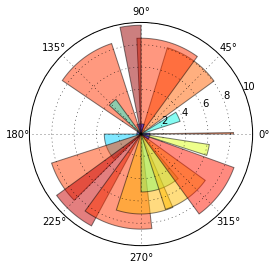

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()

Tip 2 - COMPLETION AND HELP
-----
We can explore attributes of an imported library, such as "np" above using the Tab key.
For example, here we type np.ran and hit Tab. Jupyter offers up the two ways to complete the command: random and rank.We can also add a question mark for documentation (which appears in a split screen).

In [6]:
import numpy as np
np.random?

Tip 3 - TYPESETTING
-----
By clicking "Esc" and then "m" we convert the cell to Markdown, where we can also enter $\LaTeX$:

$$e^{i \pi}+1 = 0$$

Tip 4 - PACKAGES
----------------
We can install additional packages to call on later. QuantEcon.py may be installed in terminal by typing "pip install quantecon" We will now be able to call this in Jupyter as we can standard packages.

Tip 5 - RUNNING PYTHON FILES
-------------------

We can of course copy and paste into Jupyter (and use Shift-Enter to execute), or use the "run" command.

For example, run factors.py will run the file factors.py. Jupyter only looks in the present working directory to find this file. Fortunately, basic Unix commands: "pwd", "ls", "cd", "cd .." all work to help navigate to the correct folder. Once located we can use "load factors.py" to inspect the file before running it.

Tip 6 - SAVING
-------
To save the contents of a cell as file "factors.py", put "%%file factors.py" as the first line of the cell. It will then be saved in the PWD.

Tip 7 - IMPORTING
----------
In the code below we import a particular function, "normalvariate", from the module "random".

We then use this to build up a list (which is initalised as the empty list) of Normal(0,1) values of a given length, and then plot them as white noise.

Alternatively we could have used the syntax: "import random", and then call the funcation as "random.normalvariate(0, 1)".

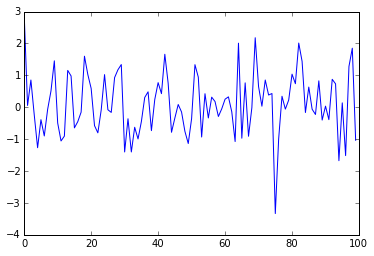

In [15]:
from random import normalvariate
import matplotlib.pyplot as plt
ts_length = 100
epsilon_values = []   # An empty list
for i in range(ts_length):
    e = normalvariate(0, 1)
    epsilon_values.append(e)
plt.plot(epsilon_values, 'b-')
plt.show()

TIP 8 - WHILE NOT FOR
------------
We can manipulate the code to use a while loop instead (the last line in the while loop can also be written "i += 1).

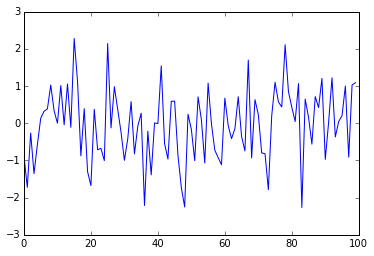

In [16]:
from random import normalvariate
import matplotlib.pyplot as plt
ts_length = 100
epsilon_values = []
i = 0
while i < ts_length:
    e = normalvariate(0, 1)
    epsilon_values.append(e)
    i = i + 1
plt.plot(epsilon_values, 'b-')
plt.show()

TIP 9 - USER-DEFINED FUNCTIONS
---------------------

We want our code to be easily readable by other people, and our logi can often be made clearer by re-writing using well-named functions.

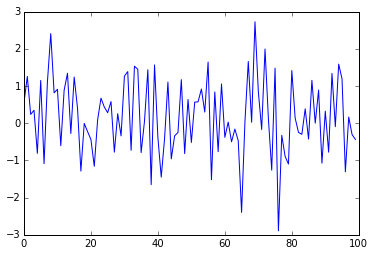

In [19]:
from random import normalvariate
import matplotlib.pyplot as plt


def generate_data(n):
    epsilon_values = []
    for i in range(n):
        e = normalvariate(0, 1)
        epsilon_values.append(e)
    return epsilon_values

data = generate_data(100)
plt.plot(data, 'b-')
plt.show()

TIP 10 - EXPANDING SCOPE
----------------
By allowing the user to choose the type of distribution they want.

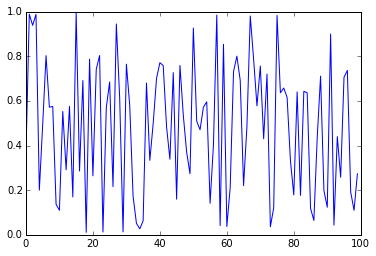

In [23]:
from random import normalvariate, uniform
import matplotlib.pyplot as plt

def generate_data(n, generator_type):
    epsilon_values = []
    for i in range(n):
        e = generator_type(0, 1)
        epsilon_values.append(e)
    return epsilon_values

# Change uniform or normalvariate in function below
data = generate_data(100, uniform)
plt.plot(data, 'b-')
plt.show()

TIP 11 -  LIST COMPREHENSION
---------------

We can use the list comprehension to place a loop within a list:

In [26]:
animals = ['dog', 'cat', 'bird']
plurals = [animal + 's' for animal in animals]
print(plurals)

['dogs', 'cats', 'birds']


With this in mind we can simplify 
```python
epsilon_values = []
for i in range(n):
    e = generator_type(0, 1)
    epsilon_values.append(e)
```    
into
```python
epsilon_values = [generator_type(0, 1) for i in range(n)]
```

TIP 12 - SCIENTIFIC LIBRARIES
--------------
In practise many of the functions already exist in a standard library, and it is worth investing time before reinventing the wheel. Our function, ``` generate_data(5) ``` already exists:

In [29]:
from numpy.random import randn
epsilon_values = randn(5)
epsilon_values

array([ 1.27718195, -1.87439353,  0.98931867,  0.19088671, -0.64095509])

TIP 13 - LEGEND
------------

We can add a legend to a plot using the code below:

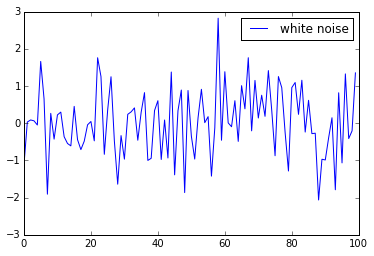

In [32]:
from pylab import plot, show, legend
from random import normalvariate

x = [normalvariate(0, 1) for i in range(100)]
plot(x, 'b-', label="white noise")
legend()
show()

TIP 14 - ITERATING
-------------
We begin by opening a document in our current working directly and reading it.

In [53]:
data = open('us_cities.txt', 'r')

In [54]:
data.read()

'new york: 8244910\nlos angeles: 3819702\nchicago: 2707120 \nhouston: 2145146\nphiladelphia: 1536471\nphoenix: 1469471\nsan antonio: 1359758\nsan diego: 1326179\ndallas: 1223229\n'

We will now make the information more readable - capitalizing names and adding commas to mark thousands.

In [56]:
data_file = open('us_cities.txt', 'r')
for line in data_file:
    city, population = line.split(':')            # Tuple unpacking, break up parts of line
    city = city.title()                           # Capitalize city names
    population = '{0:,}'.format(int(population))  # Add commas to numbers using standard fn
    print(city.ljust(20) + population)            # ljust regulates column width
data_file.close()

New York            8,244,910
Los Angeles         3,819,702
Chicago             2,707,120
Houston             2,145,146
Philadelphia        1,536,471
Phoenix             1,469,471
San Antonio         1,359,758
San Diego           1,326,179
Dallas              1,223,229


TIP 15 - LOOPING WITHOUT INDICES
-------------------
Python prefers looping without indices, and the ```zip()``` command may be used for stepping through pairs from two sequences to add pairing.


In [58]:
countries = ('England', 'Scotland', 'China')
cities = ('London', 'Edinburgh', 'Beijing')
for country, city in zip(countries, cities):
    print('The capital of {0} is {1}'.format(country, city))

The capital of England is London
The capital of Scotland is Edinburgh
The capital of China is Beijing


The ```zip()``` may also be used to create dictionaries:

In [60]:
names = ['Tom', 'Dick', 'Harry']

ages = ['23', '34', '56']

dict(zip(names, ages))

{'Dick': '34', 'Harry': '56', 'Tom': '23'}

If we actually need the index from a list, one option is to use ```enumerate()```:

In [61]:
letter_list = ['a', 'b', 'c']
for index, letter in enumerate(letter_list):
    print("letter_list[{0}] = '{1}'".format(index, letter))

letter_list[0] = 'a'
letter_list[1] = 'b'
letter_list[2] = 'c'


TIP 16 - ONE-LINE FUNCTIONS
----------
We can condense simple functions into a single line using the ```lambda``` command, and don't even have to name them.

```
def f(x):
    return x**3
```
is equivalent to 
```
f = lambda x: x**3
```

Suppose we now want to integrate, $\int_0^2 x^3 \mathrm{d}x$, we can use the definite intergation built in function ```quad(f, a, b)``` where ```f``` is a function and ```a``` and ```b``` are numbers.

In [62]:
from scipy.integrate import quad
quad(lambda x: x**3, 0, 2)

(4.0, 4.440892098500626e-14)

The ```lambda``` is said to be anonymous, because it was never given a name.